In [ ]:
import mlflow

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import r2_score

In [2]:
logged_model = 'runs:/323a53dfcab1406b8ae003df535eb46d/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

In [8]:
test = pd.read_csv('./data/processed/x_test.csv')

In [ ]:
test

,year,hour_of_day,is_holiday,weekday,is_workingday,temperature,feels_like_temperature,humidity,windspeed,year.1,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1,1.077962,0,6,0,1.573679,1.287349,-1.851653,0.031899,2012,...,False,False,False,True,False,False,False,False,False,False
1,1,1.222591,1,1,0,-1.334648,-1.445923,-1.125980,0.276306,2012,...,False,False,False,False,False,False,False,False,False,False
2,0,-1.380744,0,5,1,-0.919172,-1.005411,0.169865,0.764304,2011,...,False,False,False,False,False,False,False,True,False,False
3,1,1.077962,0,2,1,1.469810,1.375219,-0.555808,1.374096,2012,...,False,False,True,False,False,False,False,False,False,False
4,0,-1.670004,0,4,1,-1.230779,-1.445923,-0.348473,1.618504,2011,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,1,-0.223706,0,3,1,1.677548,1.727862,-0.555808,-0.456099,2012,...,False,False,False,True,False,False,False,False,False,False
5210,1,-0.368336,0,6,0,-0.607566,-0.476447,-1.333315,-1.553889,2012,...,False,True,False,False,False,False,False,False,False,False
5211,1,0.065553,0,0,0,1.573679,1.287349,-1.540650,0.276306,2012,...,False,False,False,True,False,False,False,False,False,False
5212,1,0.065553,0,2,1,0.119516,0.140969,0.273533,0.031899,2012,...,False,False,False,False,False,False,False,False,False,True


In [20]:
test.loc[3:5]

,year,hour_of_day,is_holiday,weekday,is_workingday,temperature,feels_like_temperature,humidity,windspeed,year.1,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
3,1,1.077962,0,2,1,1.469810,1.375219,-0.555808,1.374096,2012,...,False,False,True,False,False,False,False,False,False,False
4,0,-1.670004,0,4,1,-1.230779,-1.445923,-0.348473,1.618504,2011,...,False,False,False,False,False,False,False,False,False,False
5,0,-1.670004,0,5,1,-0.295959,-0.211674,0.480868,0.764304,2011,...,False,False,False,False,False,False,False,False,False,False


In [21]:


loaded_model.predict(pd.DataFrame(test.loc[3:5]))

array([447.62892985,   4.32841073,  30.04942247])

In [22]:
y_test = pd.read_csv('./data/processed/y_test.csv')

In [ ]:


r2 = r2_score(y_test, loaded_model.predict(pd.DataFrame(test)))

In [28]:
r2

0.9005759497436322

In [34]:
def plot_regression_results(y_true, y_pred):
    """Genera gráficas para evaluar el rendimiento de un modelo de regresión.

    Args:
    y_true (array-like): Valores reales.
    y_pred (array-like): Predicciones del modelo.
    """

    y_true = np.array(y_true).ravel()  # Asegúrate de que es 1D
    y_pred = np.array(y_pred).ravel()  # Asegúrate de que es 1D

    # Comprobar si las longitudes son iguales
    if y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Las dimensiones de y_true y y_pred deben ser iguales.")

    # Gráfica 1: Predicciones vs Valores reales
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.scatter(y_true, y_pred, color='blue', alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title('Predicciones vs Valores Reales')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.grid()

    # Gráfica 2: Residuos
    plt.subplot(1, 3, 2)
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.title('Residuos vs Predicciones')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.grid()

    # Gráfica 3: Histograma de Residuos
    plt.subplot(1, 3, 3)
    sns.histplot(residuals, bins=30, kde=True, color='blue')
    plt.title('Histograma de Residuos')
    plt.xlabel('Residuos')
    plt.ylabel('Frecuencia')
    plt.grid()

    plt.tight_layout()
    plt.show()



In [35]:
test.shape, y_test.shape


((5214, 35), (5214, 1))

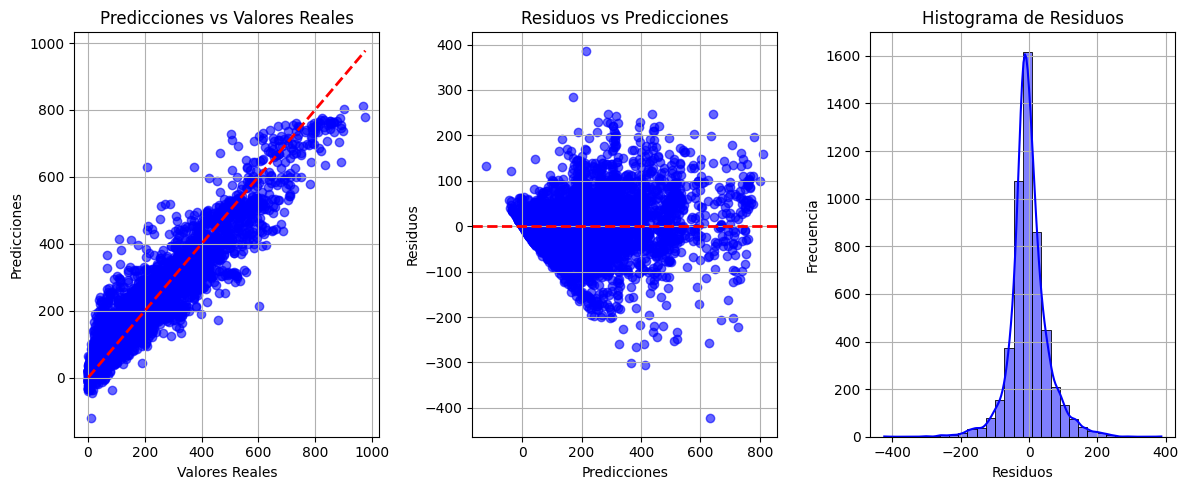

In [36]:
plot_regression_results(y_test, loaded_model.predict(pd.DataFrame(test)))
